# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: Jainul Amitkumar Trivedi

I have used the following AI tools: Chat GPT 

I understand that my submission needs to be my own work: JAT

## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

In Visual Studio Code: Use Export (click on ... in the menu bar) to save your notebook as a HTML file.

In Colab you need to save the notebook on GoogleDrive and then add the following block

In [8]:
# !pip install nbconvert
# from google.colab import drive
# drive.mount('/content/drive')
# !jupyter nbconvert --to html /content/drive/MyDrive/Colab\ Notebooks/Copy\ of\ robot_vacuum.ipynb

You will need to fix the file location on your GoogleDrive.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [9]:
# make sure numpy is installed
!pip install -q numpy

In [10]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [11]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

'south'

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a different performance measure than the one specified in the PEAS description! Since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room. Your implementation needs to implement the **correct performance measure.** The energy budget of the agent is specified as `max_steps`.

In [12]:
def simple_environment(agent, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned

Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [13]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: south
step 1 - action: suck
step 2 - action: west
step 3 - action: south
step 4 - action: suck
step 5 - action: north
step 6 - action: south
step 7 - action: north
step 8 - action: north
step 9 - action: north
step 10 - action: south
step 11 - action: north
step 12 - action: suck
step 13 - action: north
step 14 - action: north
step 15 - action: north
step 16 - action: north
step 17 - action: north
step 18 - action: east
step 19 - action: suck


4

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable. For example, long lines may get cut off. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [14]:
import numpy as np
import random

# Random number generator
actions = ["north", "east", "west", "south"] # Directions for the agent to move 

# Simple environment function
def SimpleEnvironment(a, agent, room_size, max_steps=25, verbose=True):
    # 3 global variables are declared
    global steps_performed
    global target_x  
    global target_y

    # Generate dirtiness: True for dirty, False for clean with 50% probability
    dirty = [[random.random() < 0.5 for _ in range(room_size)] for _ in range(room_size)]  
    x, y = random.randint(0, room_size - 1), random.randint(0, room_size - 1)

    # Initialize variables for model and non-model agents
    num_cleaned = 0

    if a == "model":
        steps_performed, x, y = locateCorner(room_size, x, y) # calling of locateCorner function
        target_x, target_y = x, y
    else:
        steps_performed = 0

    for i in range(steps_performed, max_steps):
        # Define bumpers based on the vacuum's position within the room 
        bumpers = get_bumpers(room_size, x, y)

        # Get action from the agent
        action, x, y = agent(room_size, bumpers, dirty[x][y], x, y)

        if verbose:
            print(f"Step {i} - Action: {action}")

        # If the action is 'suck', clean the tile
        if action == "suck":
            dirty[x][y] = False
            num_cleaned += 1

    return num_cleaned

# Function to determine bumpers based on the vacuum's position
def get_bumpers(room_size, x, y):
    bumpers = {"north": x == 0, "south": x == room_size - 1, "west": y == 0, "east": y == room_size - 1}
    return bumpers

## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function. Use the function signature for the `simple_randomized_agent` function above.

In [15]:
# Simple reflex agent definition
def simple_reflex_agent(room_size, bumpers, dirty, x, y):
    if dirty:
        return "suck", x, y
    else:
        while True:
            a = np.random.choice(actions)  # Random choice selection 
            if not bumpers[a]:
                if a == 'north':
                    x -= 1
                elif a == 'south':
                    x += 1
                elif a == 'west':
                    y -= 1
                elif a == 'east':
                    y += 1
                return a, x, y
            
SimpleEnvironment("simple", simple_reflex_agent, 5, 20)

Step 0 - Action: north
Step 1 - Action: suck
Step 2 - Action: north
Step 3 - Action: suck
Step 4 - Action: west
Step 5 - Action: east
Step 6 - Action: north
Step 7 - Action: west
Step 8 - Action: east
Step 9 - Action: south
Step 10 - Action: north
Step 11 - Action: south
Step 12 - Action: west
Step 13 - Action: north
Step 14 - Action: south
Step 15 - Action: south
Step 16 - Action: suck
Step 17 - Action: east
Step 18 - Action: south
Step 19 - Action: west


3

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

#### The agent makes choices based on where it is right now and what it knows about the nearest corner. Both the target corner and  the agent's current place are part of its state. It first spots the closest corner. Then, it moves through the grid, checking its location  and the cleanliness of the tiles. This way, it makes sure everything gets cleaned.

locatecorner : It locates the nearest corner to the agent


model_based_agent : It gets a proper path to clean the room

In [16]:
# Function to find the nearest corner
def locateCorner(room_size, x, y): 
    steps_performed = 0

    # Find nearest corner based on the position relative to the midpoint of the room
    if x < (room_size / 2):
        target_x = 0
    else: 
        target_x = room_size - 1  # Adjusted to room_size - 1 to stay within bounds
    if y < (room_size / 2):
        target_y = 0 
    else:
        target_y = room_size - 1  # Adjusted to room_size - 1 to stay within bounds

    # Move towards the corner
    if target_x == 0 and target_y == 0:
        while x != 0:
            x -= 1
            print("step", steps_performed, "- action: north")
            steps_performed += 1
        while y != 0:
            y -= 1
            print("step", steps_performed, "- action: west")
            steps_performed += 1

    elif target_x == 0 and target_y == room_size - 1:
        while x != 0:
            x -= 1
            print("step", steps_performed, "- action: north")
            steps_performed += 1
        while y != room_size - 1:
            y += 1  
            print("step", steps_performed, "- action: east")
            steps_performed += 1

    elif target_x == room_size - 1 and target_y == 0: 
        while x != room_size - 1:
            x += 1
            print("step", steps_performed, "- action: south")
            steps_performed += 1
        while y != 0:
            y -= 1
            print("step", steps_performed, "- action: west")
            steps_performed += 1

    elif target_x == room_size - 1 and target_y == room_size - 1:
        while x != room_size - 1: 
            x += 1
            print("step", steps_performed, "- action: south")
            steps_performed += 1
        while y != room_size - 1:
            y += 1
            print("step", steps_performed, "- action: east")
            steps_performed += 1

    return steps_performed, x, y

# Model-based agent function
def model_based_agent(room_size, bumpers, dirty, x, y): 
    if not dirty:
        # If the nearest corner is (0,0), follow the pattern
        if target_x == 0 and target_y == 0:
            if x % 2 == 0: 
                if y < room_size - 1:
                    y += 1
                    return "east", x, y
                elif x < room_size - 1:
                    x += 1 
                    return "south", x, y
            else:
                if y > 0:
                    y -= 1
                    return "west", x, y
                else:
                    x += 1
                    return "south", x, y

        # If the nearest corner is (0, room_size - 1), follow this pattern
        elif target_x == 0 and target_y == room_size - 1:
            if x % 2 == 0:
                if y < room_size - 1:
                    y += 1
                    return "east", x, y
                elif x < room_size - 1:
                    x += 1
                    return "south", x, y
            else:
                if y > 0:
                    y -= 1
                    return "west", x, y
                else:
                    x += 1
                    return "south", x, y

        # If the nearest corner is (room_size - 1, 0) or (room_size - 1, room_size - 1)
        elif (target_x == room_size - 1 and target_y == 0) or (target_x == room_size - 1 and target_y == room_size - 1):
            if y < room_size - 1:
                y += 1
                return "east", x, y
            else:
                x -= 1
                return "north", x, y

        elif y > 0:
            y -= 1
            return "west", x, y

        else:
            x += 1
            return "north", x, y

    else:
        return "suck", x, y

# Example of running the Simple Environment with a Simple Reflex Agent
SimpleEnvironment("model", simple_reflex_agent, 10,50)

step 0 - action: north
step 1 - action: east
step 2 - action: east
step 3 - action: east
Step 4 - Action: suck
Step 5 - Action: south
Step 6 - Action: west
Step 7 - Action: suck
Step 8 - Action: east
Step 9 - Action: south
Step 10 - Action: suck
Step 11 - Action: north
Step 12 - Action: south
Step 13 - Action: north
Step 14 - Action: south
Step 15 - Action: north
Step 16 - Action: south
Step 17 - Action: west
Step 18 - Action: west
Step 19 - Action: west
Step 20 - Action: suck
Step 21 - Action: east
Step 22 - Action: east
Step 23 - Action: east
Step 24 - Action: west
Step 25 - Action: north
Step 26 - Action: east
Step 27 - Action: north
Step 28 - Action: south
Step 29 - Action: north
Step 30 - Action: south
Step 31 - Action: west
Step 32 - Action: north
Step 33 - Action: south
Step 34 - Action: east
Step 35 - Action: west
Step 36 - Action: west
Step 37 - Action: south
Step 38 - Action: north
Step 39 - Action: north
Step 40 - Action: suck
Step 41 - Action: east
Step 42 - Action: south
S

5

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. E.g., $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

In [17]:
# import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the environment and agents as before, but ensure no verbose output

def SimpleEnvironment(a, agent, room_size, max_steps=100, verbose=False):
    # Initialize the room (grid) and random dirt placement
    dirty = [[np.random.random() < 0.5 for _ in range(room_size)] for _ in range(room_size)]
    
    # Starting position of the agent
    x, y = np.random.randint(0, room_size), np.random.randint(0, room_size)

    num_cleaned = 0
    for i in range(max_steps):
        bumpers = {
            "north": x == 0,
            "south": x == room_size - 1,
            "west": y == 0,
            "east": y == room_size - 1
        }

        action, x, y = agent(room_size, bumpers, dirty[x][y], x, y)

        # Ensure x and y stay within bounds
        x = max(0, min(x, room_size - 1))
        y = max(0, min(y, room_size - 1))

        # If the action is to clean ("suck"), clean the current position
        if action == "suck":
            dirty[x][y] = False
            num_cleaned += 1

    return num_cleaned


def simple_randomized_agent(room_size, bumpers, dirty, x, y):
    actions = ["north", "east", "west", "south"]
    if dirty:
        return "suck", x, y
    else:
        while True:
            a = np.random.choice(actions)
            if not bumpers[a]:
                if a == 'north':
                    x -= 1
                elif a == 'south':
                    x += 1
                elif a == 'west':
                    y -= 1
                elif a == 'east':
                    y += 1
                return a, x, y


# Define the model_based_agent as before
def model_based_agent(room_size, bumpers, dirty, x, y):
    if not dirty:
        if x % 2 == 0:
            if y < room_size - 1:
                y += 1
                return "east", x, y
            else:
                x += 1
                return "south", x, y
        else:
            if y > 0:
                y -= 1
                return "west", x, y
            else:
                x += 1
                return "south", x, y
    else:
        return "suck", x, y

# Simulation Study
results = {5: {}, 10: {}, 100: {}}

for room_size in [5, 10, 100]:
    randomized_agent = []
    simple_reflex_agent_scores = []
    model_based_agent_scores = []

    for _ in range(100):
        randomized_agent.append(SimpleEnvironment("randomized", simple_randomized_agent, room_size, max_steps=100))
        simple_reflex_agent_scores.append(SimpleEnvironment("simple", simple_randomized_agent, room_size, max_steps=100))
        model_based_agent_scores.append(SimpleEnvironment("model", model_based_agent, room_size, max_steps=100))

    results[room_size]["Randomized Agent"] = sum(randomized_agent) / len(randomized_agent)
    results[room_size]["Simple Reflex Agent"] = sum(simple_reflex_agent_scores) / len(simple_reflex_agent_scores)
    results[room_size]["Model-based Reflex Agent"] = sum(model_based_agent_scores) / len(model_based_agent_scores)

Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | | | |
| 10x10   | | | |
| 100x100 | | | |

Add charts to compare the performance of the different agents.

     Randomized Agent  Simple Reflex Agent  Model-based Reflex Agent
5               11.29                10.76                      6.03
10              17.35                16.89                     26.36
100             19.33                19.81                     33.58


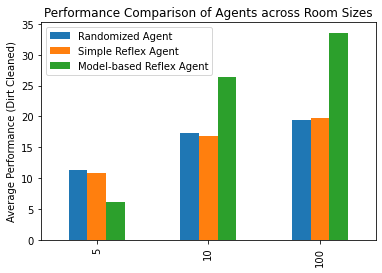

In [18]:
# Convert the results to a DataFrame for display
df = pd.DataFrame(results).T
print(df)

# Plot the results
df.plot(kind='bar')
plt.ylabel("Average Performance (Dirt Cleaned)")
plt.title("Performance Comparison of Agents across Room Sizes")
plt.show()

## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).
* if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).
* if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.

### 1. If it is put into a rectangular room with unknown size
      
SIMPLE REFLEX AGENT: The agent can come to know where is dirt but it does't contain any information regarding the state of the room. The regions can be repeated many times due to irregular rooms and it might struggle to handle the room.

MODEL BASED REFLEX AGENT: It creates a model to find the corner and works on that on it's own. It can handle bigger rooms which are in proper rectangular shapes rather than the irregular shapes.

### 2. If the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms)

SIMPLE REFLEX AGENT: It might avoid the walls and clean whenever dirt is found. It will not efficiently naviagte to places out of his coverage. 

MODEL BASED REFLEX AGENT: It tries to map and navigate space and this makes it more robust. The model building function would be robust to various irregularities.

### 3. If the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).

SIMPLE REFLEX AGENT: Because of the bumper sensor it will avoid the obstacles. It will not movve to that direction as it will find the obsatacles. If obstacles will be complex, it will be hard to detect them. 

MODEL BASED REFLEX AGENT: It will handle the obstacles effectively as it can store in the memory and it will work on effecticiently as it remembers the position of the obstacles.

### 4: If the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).

SIMPLE REFLEX AGENT: The agent will miss cleaning the proper titles and will make unnecesaary moves which should not be the case. It won't be optimized and it will take more time to clean the room if it happens.

MODEL BASED REFLEX AGENT: In this it can cross check the sensor readings and get to know the reliability of it. Accurate model can be created after certain point of time.

### 5: If the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.

SIMPLE REFLEX AGENT: It will not get to know if wall is present at certain points. It can continuously get into the walls. 

MODEL BASED REFLEX AGENT: The systematic approach might help in better handling the bumper inaccuracies and also, it might be sometimes inefficient in handling the walls and hits it. 

## Advanced task: Imperfect Dirt Sensor

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Change your simulation environment to run experiments for the following problem: The dirt sensor has a 10% chance of giving the wrong reading. Perform experiments to observe how this changes the performance of the three implementations. Your model-based reflex agent is likely not able to clean the whole room, so you need to measure performance differently as a tradeoff between energy cost and number of uncleaned squares.

2. Design an implement a solution for your model-based agent that will clean better. Show the improvement with experiments.

In [19]:
import numpy as np
import random

def randomized_agent_with_obstacles(grid_size, bumpers, is_dirty, pos_x, pos_y): # Function for creating a randomized agent for any obstacles in between 
    directions = ["north", "east", "west", "south"] # List of possible directions 
    
    if is_dirty:
        return "suck", pos_x, pos_y
    
    while True:
        move = np.random.choice(directions) # Randomly chooses for movement 
        if not bumpers[move]:
            if move == "north":
                pos_x -= 1
            elif move == "south":
                pos_x += 1
            elif move == "west":
                pos_y -= 1
            elif move == "east":
                pos_y += 1
            return move, pos_x, pos_y

def EnvironmentWithObstacles(agent_func, grid_size, max_steps, verbose=True): # The environment where the agent operates
    # Initialize the dirty grid
    dirty_grid = np.ones((grid_size, grid_size), dtype=bool)
    
    # Random start position
    start_x, start_y = random.randint(0, grid_size-1), random.randint(0, grid_size-1)
    cleaned_count = 0  # For counting no. of tiles cleaned 

    for step in range(max_steps):
        # Determine bumpers based on the agent's position
        if start_x == 0 and start_y == 0:
             bumpers = {"north": True, "south": False, "west": True, "east": False}
        elif start_x == 0 and start_y == grid_size-1:
            bumpers = {"north": True, "south": False, "west": False, "east": True}
        elif start_x == grid_size-1 and start_y == 0:
            bumpers = {"north": False, "south": True, "west": True, "east": False}
        elif start_x == grid_size-1 and start_y == grid_size-1:
            bumpers = {"north": False, "south": True, "west": False, "east": True}
        elif start_x == grid_size // 2 and start_y == grid_size // 2:
            bumpers = {"north": True, "south": True, "west": False, "east": True}
        elif start_x == 0:
            bumpers = {"north": True, "south": False, "west": False, "east": False}
        elif start_y == 0:
            bumpers = {"north": False, "south": False, "west": True, "east": False}
        elif start_x == grid_size-1:
            bumpers = {"north": False, "south": True, "west": False, "east": False}
        elif start_y == grid_size-1:
            bumpers = {"north": False, "south": False, "west": False, "east": True}
        else:
            bumpers = {"north": False, "south": False, "west": False, "east": False}

        action, start_x, start_y = agent_func(grid_size, bumpers, dirty_grid[start_x, start_y], start_x, start_y)
        
        if action == "suck":  # Tile is cleaned if agent chooses suck action 
            dirty_grid[start_x, start_y] = False
            cleaned_count += 1
            
        if verbose:  # The action taken by agent is printed if verbose= True
            print(f"Step {step} - Action: {action}")
    
    return cleaned_count

EnvironmentWithObstacles(randomized_agent_with_obstacles, 5, 30)

Step 0 - Action: suck
Step 1 - Action: north
Step 2 - Action: suck
Step 3 - Action: east
Step 4 - Action: suck
Step 5 - Action: south
Step 6 - Action: suck
Step 7 - Action: west
Step 8 - Action: east
Step 9 - Action: west
Step 10 - Action: south
Step 11 - Action: suck
Step 12 - Action: north
Step 13 - Action: south
Step 14 - Action: east
Step 15 - Action: suck
Step 16 - Action: west
Step 17 - Action: east
Step 18 - Action: west
Step 19 - Action: west
Step 20 - Action: suck
Step 21 - Action: south
Step 22 - Action: suck
Step 23 - Action: east
Step 24 - Action: suck
Step 25 - Action: north
Step 26 - Action: east
Step 27 - Action: west
Step 28 - Action: west
Step 29 - Action: east


9

## More advanced implementation tasks

* __Obstacles:__ Change your simulation environment to run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Perform experiments to observe how this changes the performance of the three implementations. Describe what would need to be done to perform better with obstacles. Add code if you can.

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actually depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currently clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
# Your ideas/code